#Import Libraries

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

#Load Data and Preliminary Look

In [61]:
df = pd.read_csv('insurance.csv')

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


data information

In [64]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null data

In [65]:
df.duplicated().sum()

1

In [66]:
#show data duplicate
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [67]:
# drop data duplicate
df.drop_duplicates(inplace=True)
# reset index after drop data duplicate
df.reset_index(drop=True, inplace=True)

In [68]:
# recheck
df.duplicated().sum()

0

In [69]:
#recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


duplicated data has been drop and the index has been reset

In [70]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


descriptive statistik for numerical columns

In [71]:
df.describe(include='O')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


descriptive statistik for categorical columns

#Exploratory Data Analysis(EDA)

using pivot table

## Age Category

In [25]:
# made 'ID' column
df['ID'] = range(1, len(df)+1)

In [26]:
#made age category column
def group_ages(x) :
  if x <= 25 :
    return 'Young'
  elif x > 25 and x < 45 :
    return 'Adult'
  elif x >= 45 and x < 60 :
    return 'Middle Age'
  else :
    return 'Elder'

referensi : https://www.researchgate.net/publication/338842581_A_cross-sectional_study_on_interference_control_age_affects_reactive_control_but_not_proactive_control

In [27]:
df['age_category'] = df['age'].apply(group_ages)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,ID,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,Young
1,18,male,33.770,1,no,southeast,1725.55230,2,Young
2,28,male,33.000,3,no,southeast,4449.46200,3,Adult
3,33,male,22.705,0,no,northwest,21984.47061,4,Adult
4,32,male,28.880,0,no,northwest,3866.85520,5,Adult


In [29]:
age_count = pd.pivot_table(data = df,
                        index = 'age_category',
                        values = 'ID',
                        aggfunc = 'count'
).reset_index()
age_count

,age_category,ID
0,Adult,503
1,Elder,114
2,Middle Age,415
3,Young,305


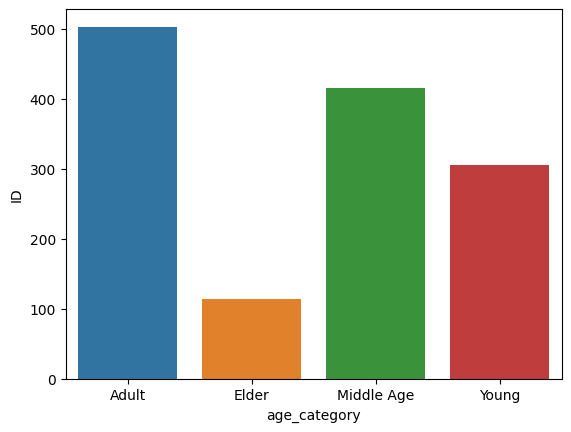

In [30]:
sns.barplot(data = age_count,
            x = 'age_category',
            y = 'ID')
plt.show()

## Age Category Charge

In [31]:
avg_charges = pd.pivot_table(data = df,
                        index = 'age_category',
                        values = 'charges',
                        aggfunc = 'mean'
).reset_index()
avg_charges

,age_category,charges
0,Adult,11818.902596
1,Elder,21248.021885
2,Middle Age,15922.929285
3,Young,9111.433685


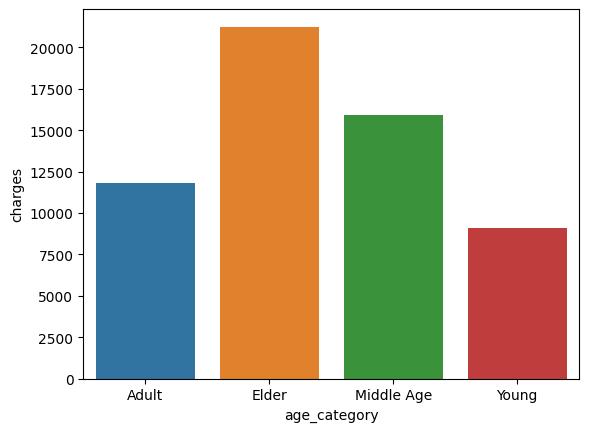

In [32]:
sns.barplot(data = avg_charges,
            x = 'age_category',
            y = 'charges')
plt.show()

## Smoker by Age Category

In [33]:
smoker_age = pd.pivot_table(data = df,
                             index = ['age_category', 'smoker'],
                             values = 'ID',
                             aggfunc = 'count').reset_index()
smoker_age

,age_category,smoker,ID
0,Adult,no,391
1,Adult,yes,112
2,Elder,no,87
3,Elder,yes,27
4,Middle Age,no,345
5,Middle Age,yes,70
6,Young,no,240
7,Young,yes,65


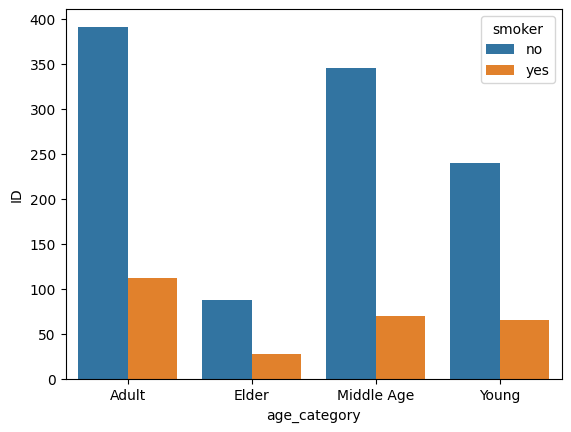

In [34]:
sns.barplot(data = smoker_age,
            x = 'age_category',
            y = 'ID',
            hue = 'smoker')
plt.show()

## Sex

In [35]:
sex_count = pd.pivot_table(data = df,
                        index = 'sex',
                        values = 'ID',
                        aggfunc = 'count'
).reset_index()
sex_count

,sex,ID
0,female,662
1,male,675


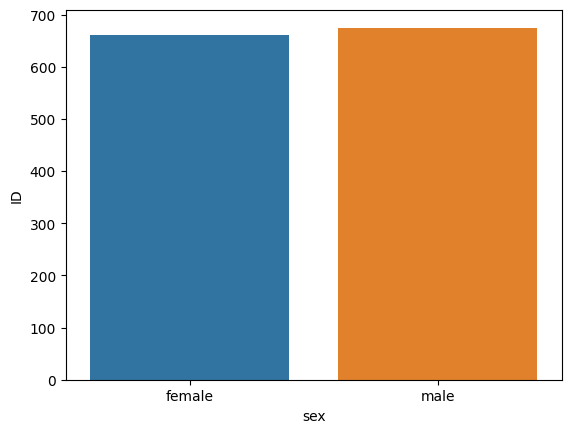

In [36]:
sns.barplot(data = sex_count,
            x = 'sex',
            y = 'ID')
plt.show()

## Charge by Sex

In [37]:
sex_charge = pd.pivot_table(data = df,
                        index = 'sex',
                        values = 'charges',
                        aggfunc = 'mean'
).reset_index()
sex_charge

,sex,charges
0,female,12569.578844
1,male,13974.998864


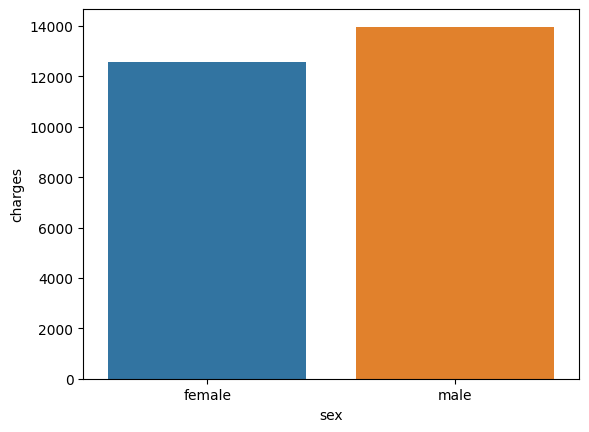

In [38]:
sns.barplot(data = sex_charge,
            x = 'sex',
            y = 'charges')
plt.show()

## Smoker Sex

In [39]:
smoker_sex = pd.pivot_table(data = df,
                             index = ['sex', 'smoker'],
                             values = 'ID',
                             aggfunc = 'count').reset_index()
smoker_sex

,sex,smoker,ID
0,female,no,547
1,female,yes,115
2,male,no,516
3,male,yes,159


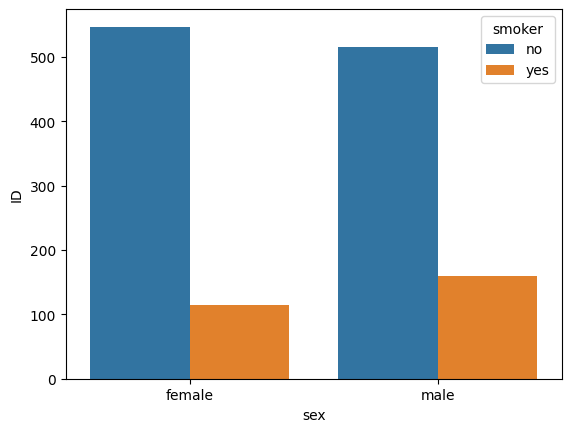

In [40]:
sns.barplot(data = smoker_sex,
            x = 'sex',
            y = 'ID',
            hue = 'smoker')
plt.show()

## Smoker

In [41]:
smoker_count = pd.pivot_table(data = df,
                        index = 'smoker',
                        values = 'ID',
                        aggfunc = 'count'
).reset_index()
smoker_count

,smoker,ID
0,no,1063
1,yes,274


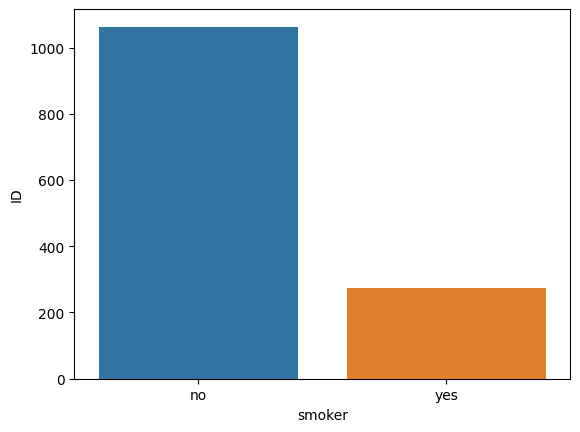

In [42]:
sns.barplot(data = smoker_count,
            x = 'smoker',
            y = 'ID')
plt.show()

## Smoker Charge

In [43]:
avg_charges_smoker = pd.pivot_table(data = df,
                        index = 'smoker',
                        values = 'charges',
                        aggfunc = 'mean'
).reset_index()
avg_charges_smoker

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


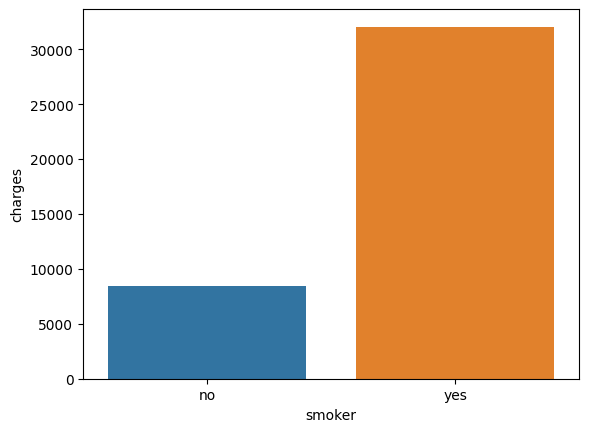

In [44]:
sns.barplot(data = avg_charges_smoker,
            x = 'smoker',
            y = 'charges')
plt.show()

## Region

In [45]:
region_count = pd.pivot_table(data = df,
                        index = 'region',
                        values = 'ID',
                        aggfunc = 'count'
).reset_index()
region_count

,region,ID
0,northeast,324
1,northwest,324
2,southeast,364
3,southwest,325


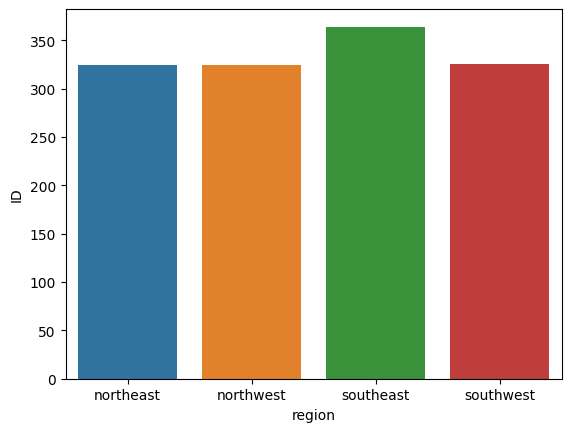

In [46]:
sns.barplot(data = region_count,
            x = 'region',
            y = 'ID')
plt.show()

## Avg Charge by Regions

In [47]:
avg_charges_region = pd.pivot_table(data = df,
                        index = 'region',
                        values = 'charges',
                        aggfunc = 'mean'
).reset_index()
avg_charges_region

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


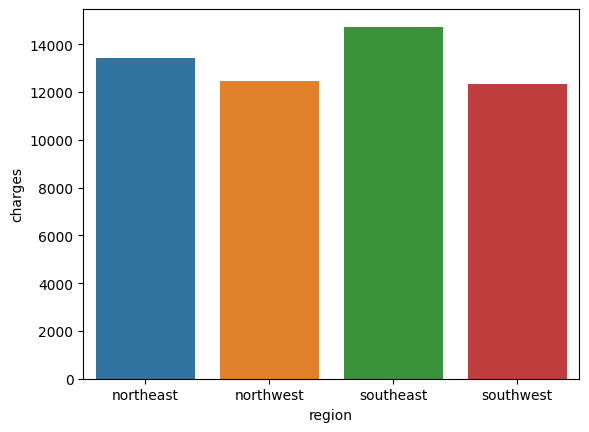

In [48]:
sns.barplot(data = avg_charges_region,
            x = 'region',
            y = 'charges')
plt.show()

## Smoker Region

In [49]:
smoker_region = pd.pivot_table(data = df,
                             index = ['region', 'smoker'],
                             values = 'ID',
                             aggfunc = 'count').reset_index()
smoker_region

,region,smoker,ID
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,266
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


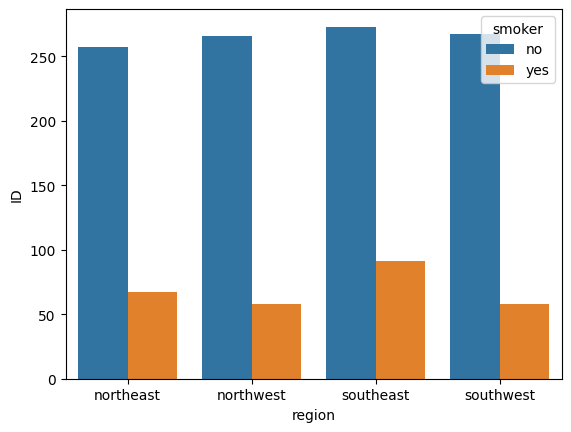

In [50]:
sns.barplot(data = smoker_region,
            x = 'region',
            y = 'ID',
            hue = 'smoker')
plt.show()

# Analisis korelasi


## Correlation

In [51]:
#group columns numeric
num = ['age','bmi','children','charges']

df[num].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


## Pairplot

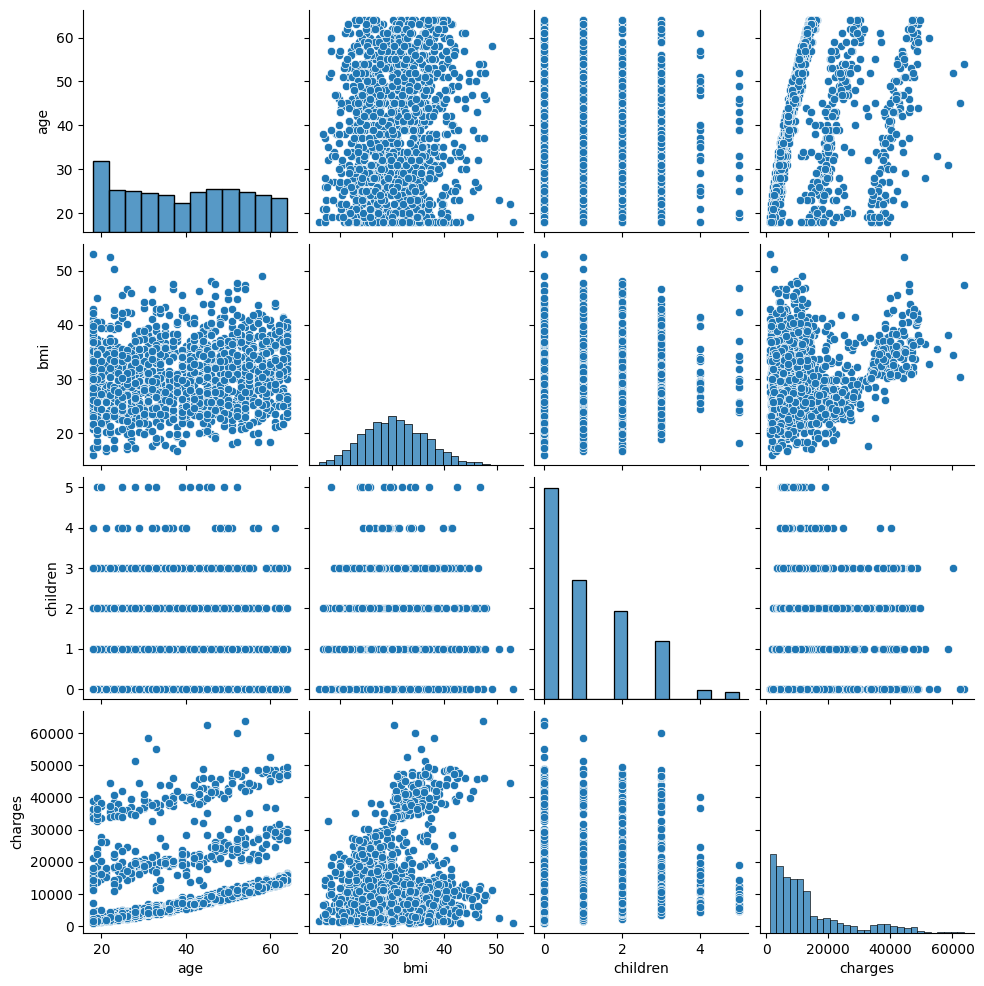

In [52]:
sns.pairplot(df[num])

## Heatmap Correlation

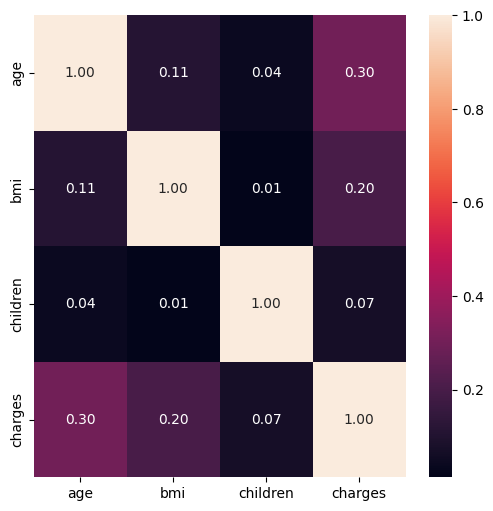

In [53]:
#correlation
cor = df[num].corr()

#visualization
plt.figure(figsize=(6,6))
sns.heatmap(cor, annot=True, fmt='.2f')
plt.show()

# Chi Square Test & Regresi Linear

## analisa chi square tes pada fitur age dan charges

In [72]:
# menghitung chi square test

stat, p, dof, expected = chi2_contingency(df[['age', 'charges']])

In [73]:
stat

32125.326019268898

In [74]:
p

0.0

In [75]:
dof

1336

In [76]:
expected

array([[4.97815702e+01, 1.68541424e+04],
       [5.13471140e+00, 1.73841759e+03],
       [1.31859969e+01, 4.46427600e+03],
       ...,
       [4.85282229e+00, 1.64298068e+03],
       [5.97518470e+00, 2.02296982e+03],
       [8.60001116e+01, 2.91163602e+04]])

In [77]:
alpha = 0.05

if p <= alpha :
  print('Tolak H0 : terdapat hubungan antara age dan charges')
else :
  print('Tidak menolak H0 : tidak terdapat hubungan antara age dan charges')

Tolak H0 : terdapat hubungan antara age dan charges


## regresi linear pada fitur age dan charges

In [96]:
X = df['age'].values.reshape(-1,1)
y = df['charges']

In [97]:
model = LinearRegression()

In [98]:
model.fit(X,y)

LinearRegression()

In [99]:
model.coef_

array([257.22971752])

In [100]:
model.intercept_

3190.021721031824

In [101]:
df['predict'] = model.predict(X)

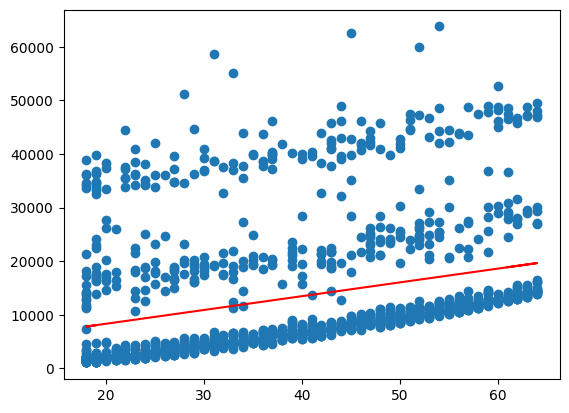

In [104]:
plt.scatter(df['age'], df['charges'])
plt.plot(df['age'], df['predict'], c='red')
plt.show()

## analisa chi square tes pada fitur age dan BMI

In [84]:
# menghitung chi square test

stat, p, dof, expected = chi2_contingency(df[['age', 'bmi']])

In [85]:
stat

3629.020303666912

In [86]:
p

8.527852772221698e-211

In [87]:
dof

1336

In [88]:
expected

array([[26.32185407, 20.57814593],
       [29.05506152, 22.71493848],
       [34.2352473 , 26.7647527 ],
       ...,
       [30.78366089, 24.06633911],
       [26.26573071, 20.53426929],
       [50.55030695, 39.51969305]])

In [89]:
alpha = 0.05

if p <= alpha :
  print('Tolak H0 : terdapat hubungan antara age dan BMI')
else :
  print('Tidak menolak H0 : tidak terdapat hubungan antara age dan BMI')

Tolak H0 : terdapat hubungan antara age dan BMI


## regresi linear pada fitur age dan BMI

In [105]:
X = df['age'].values.reshape(-1,1)
y = df['bmi']

In [106]:
model = LinearRegression()

In [107]:
model.fit(X,y)

LinearRegression()

In [108]:
model.coef_

array([0.04749583])

In [109]:
model.intercept_

28.80056370269898

In [110]:
df['predict'] = model.predict(X)

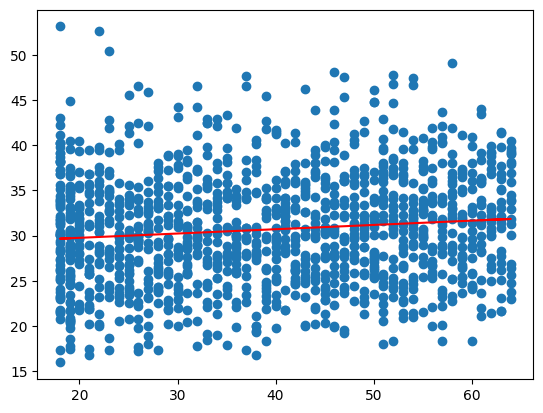

In [111]:
plt.scatter(df['age'], df['bmi'])
plt.plot(df['age'], df['predict'], c='red')
plt.show()

## analisa chi square tes pada fitur BMI dan charges

In [90]:
# menghitung chi square test

stat, p, dof, expected = chi2_contingency(df[['bmi', 'charges']])

In [91]:
stat

51646.21713802256

In [92]:
p

0.0

In [93]:
dof

1336

In [94]:
expected

array([[3.89642331e+01, 1.68738598e+04],
       [4.05317552e+00, 1.75526912e+03],
       [1.03268203e+01, 4.47213518e+03],
       ...,
       [3.83975168e+00, 1.66284375e+03],
       [4.68539815e+00, 2.02905960e+03],
       [6.72036465e+01, 2.91032267e+04]])

In [95]:
alpha = 0.05

if p <= alpha :
  print('Tolak H0 : terdapat hubungan antara BMI dan charges')
else :
  print('Tidak menolak H0 : tidak terdapat hubungan antara BMI dan charges')

Tolak H0 : terdapat hubungan antara BMI dan charges


## regresi linear pada fitur BMI dan charges



In [112]:
X = df['bmi'].values.reshape(-1,1)
y = df['charges']

In [113]:
model = LinearRegression()

In [114]:
model.fit(X,y)

LinearRegression()

In [115]:
model.coef_

array([393.85589121])

In [116]:
model.intercept_

1202.1403670662094

In [117]:
df['predict'] = model.predict(X)

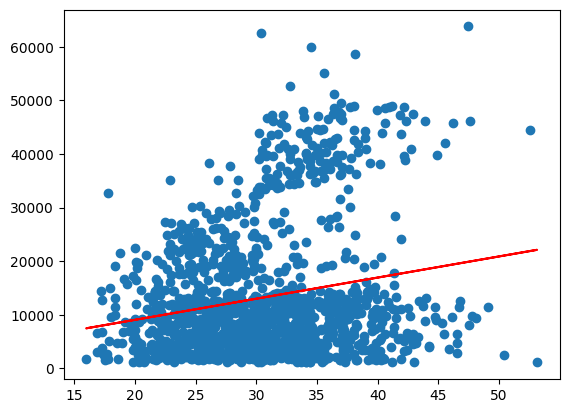

In [118]:
plt.scatter(df['bmi'], df['charges'])
plt.plot(df['bmi'], df['predict'], c='red')
plt.show()